In [594]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

In [526]:
import locale
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252') 

'Spanish_Spain.1252'

# ETL - EDA

In [527]:
hechos = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')
hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [528]:
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [529]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

## Manejo de duplicados

Se realizó la revisión de duplicados del dataset y se encontró que no existian valores repetidos para todas las columnas

In [530]:
hechos[hechos.duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


## Manejos de nulos

Se encontró que existian nulos en las columnas *'Calle'*, *'Altura'*, *'Cruce'* y *'Direccion Normalizada'*. Estas columnas aportan informacion sobre la ubicacion del siniestro. De acuerdo con esto, se decidio extraer la informacion esencial que nos ofrecen estos datos. Se decidio declarar dos variables nuevas: **INTERSECCION** y **VIAS_INVOL** que se explican a continuacion.

In [531]:
hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

#### Intersecciones

La columna __*INTERSECCION*__ indica si el siniestro se produjo en una interseccion. Para esto se observo que los hechos ocurridos en intersecciones contenian el nombre de la segunda via en la columna *Cruce* y los que ocurrian a mitad de cuadra tenian la especificacion en la columna *Altura*. Sin embargo, se encontro que existian hechos que no tenian valores en ninguna de las dos columnas antes mencionadas. Se analizo detenidamente la columna *LUGAR_DEL_HECHO* y se identifico que estos tenian una especificacion equivalente a la altura en su despripcion (en su mayoria en KM). De acuerdo con esto, se tomo que los valores en nulo de la columna *Cruce* tuvieran o no valor de *Altura* eran siniestros que no ocurrieron en una interseccion. De esta manera, se declaró esta variable como 1 para hechos en interseccion y 0 para los que no.

In [532]:
pd.set_option('display.max_colwidth', None)
print(hechos[(hechos['Altura'].isnull())&(hechos['Cruce'].isnull())]['LUGAR_DEL_HECHO'])
pd.reset_option('display.max_colwidth')

35                                   AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM. 0,700
38                                                             AUTOPISTA LUGONES PK 10000
64                                       AUTOPISTA 1 SUR PTE ARTURO FRONDIZI Y AV CASEROS
71                                           AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3
81                                                AUTOPISTA 9 DE JULIO SUR ALT AV MENDOZA
91                                             AUTOPISTA 1 SUR PTE ARTURO FRONDIZI KM 2.9
100                                                  AUTOPISTA 9 DE JULIO SUR Y AV BRASIL
106                                                      AU BUENOS AIRES - LA PLATA KM. 4
119                                                                                    SD
127                                                   AUTOPISTA PERITO MORENO ALTURA VELZ
139                                                                  AUTOPISTA 25 DE MAYO
148       

In [533]:
hechos['INTERSECCION'] = hechos['Cruce'].notnull().astype(int)

In [534]:
hechos['INTERSECCION'].value_counts()

INTERSECCION
1    525
0    171
Name: count, dtype: int64

In [535]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,INTERSECCION
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,0
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1


#### Vias involucradas

In [536]:
hechos['Calle'].unique().size

280

In [537]:
hechos['Cruce'].unique().size

318

In [538]:
hechos['VIAS_INVOL']=hechos.apply(lambda row: [row['Calle'], row['Cruce']] if pd.notnull(row['Cruce']) else [row['Calle']], axis=1)

In [539]:
hechos[['Calle','Cruce','VIAS_INVOL']]

,Calle,Cruce,VIAS_INVOL
0,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G..."
1,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]"
2,ENTRE RIOS AV.,NaN,[ENTRE RIOS AV.]
3,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]"
4,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]"
...,...,...,...
691,RIESTRA AV.,MOM,"[RIESTRA AV., MOM]"
692,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"[DELLEPIANE, LUIS, TTE. GRAL., LACARRA AV.]"
693,GAONA AV.,TERRADA,"[GAONA AV., TERRADA]"
694,"PERON, EVA AV.",NaN,"[PERON, EVA AV.]"


In [540]:
hechos.drop(columns=['Calle','Cruce','Altura','Dirección Normalizada','LUGAR_DEL_HECHO'],inplace=True)

In [541]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,INTERSECCION,VIAS_INVOL
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G..."
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]"
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,0,[ENTRE RIOS AV.]
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]"
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]"


### Ubicacion geografica

Tambien se encontro que en las columnas **'pos x'** y **'pos y'** existian 12 registros con valores que era *'.'* lo cual es equivalente a que no existe el dato. Por esta razon se decidió revisar si existian duplicados según estas columnas y se obtuvieron 150 registros. Sin embargo, aunque fueran duplicados segun estas dos columnas el resto de la informacion era diferente. Teniendo en cuenta lo anterior se decidió imputar los datos faltantes con la moda segun cada *'COMUNA'* para no afectar la informacion segun esta caracteristica que se revisara mas adelante. En el momento de realizar esto, se encontró que existian la comuna *'0'* que no existe en la realidad. Se verificó que información contenian estos registros y se encontro que contaban en su mayoria con *'SD'* en la tabla de *'hechos'* como en la de *'victimas'* (segun el *'ID'* correspondiente). De acuerdo con esto, se decidio eliminar estos 2 registros.

In [542]:
hechos[(hechos['pos y']=='.')&(hechos['pos x']=='.')]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,INTERSECCION,VIAS_INVOL
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA,13,Point (. .),.,.,MOTO-SD,MOTO,SD,0,"[LUGONES, LEOPOLDO AV.]"
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AUTOPISTA,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,0,[AUTOPISTA BUENOS AIRES - LA PLATA]
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,CALLE,0,Point (. .),.,.,PEATON-SD,PEATON,SD,0,[nan]
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA,0,Point (. .),.,.,SD-SD,SD,SD,0,[AUTOPISTA 25 DE MAYO]
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,GRAL PAZ,14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,0,"[LUGONES, LEOPOLDO AV.]"
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AUTOPISTA,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,0,[AUTOPISTA PERITO MORENO]
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AUTOPISTA,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO,0,[AUTOPISTA DELLEPIANE LUIS TTE. GRAL.]
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AUTOPISTA,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS,0,[AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI]
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO,0,"[LUGONES, LEOPOLDO AV.]"
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,AUTOPISTA,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,0,"[LUGONES, LEOPOLDO AV.]"


In [543]:
hechos[hechos.duplicated(subset=['pos x','pos y'],keep=False)]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,INTERSECCION,VIAS_INVOL
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]"
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AVENIDA,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,1,"[27 DE FEBRERO AV., ESCALADA AV.]"
7,2016-0010,1,2016-01-29,2016,1,29,15:20:00,15,GRAL PAZ,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,MOTO-AUTO,MOTO,AUTO,1,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]"
17,2016-0025,1,2016-02-28,2016,2,28,04:50:00,4,GRAL PAZ,8,Point (100077.95205948 91571.23307293),-58.46244952,-34.70524971,AUTO-AUTO,AUTO,AUTO,1,"[PAZ, GRAL. AV., 27 DE FEBRERO AV.]"
22,2016-0031,1,2016-03-08,2016,3,8,12:30:00,12,GRAL PAZ,8,Point (99327.01838497 92326.91130631),-58.47064556,-34.69843756,MOTO-PASAJEROS,MOTO,PASAJEROS,1,"[PAZ, GRAL. AV., ROCA, CNEL. AV.]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2021-0072,1,2021-09-01,2021,9,1,19:10:00,19,AVENIDA,2,Point (106445.10866138 103387.80115442),-58.39303911,-34.59871111,PEATON-AUTO,PEATON,AUTO,1,"[CALLAO AV., PARAGUAY]"
672,2021-0074,1,2021-09-20,2021,9,20,15:00:00,15,GRAL PAZ,12,Point (96563.66494817 108815.73881056),-58.50073810,-34.54979510,MULTIPLE,MOTO,MULTIPLE,1,"[PAZ, GRAL. AV., BALBIN, RICARDO, DR. AV.]"
676,2021-0078,1,2021-10-23,2021,10,23,06:35:00,6,AVENIDA,6,Point (103255.81315650 100797.78656418),-58.42779702,-34.62207347,MOTO-PASAJEROS,MOTO,PASAJEROS,1,"[INDEPENDENCIA AV., LA PLATA AV.]"
690,2021-0092,1,2021-12-12,2021,12,12,06:20:00,6,AVENIDA,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO,1,"[RIVADAVIA AV., PUEYRREDON AV.]"


In [544]:
hechos['pos x'] = hechos['pos x'].apply(lambda x: None if x== '.' else x)
hechos['pos y'] = hechos['pos y'].apply(lambda x: None if x== '.' else x)

In [545]:
hechos[(hechos['pos x'].isnull())&(hechos['pos y'].isnull())]['COMUNA']

38     13
106     4
119     0
139     0
176    14
180     9
181     7
256     4
313    14
546    14
559     9
621     4
Name: COMUNA, dtype: int64

In [546]:
hechos[hechos['COMUNA']==0]
# victimas[(victimas['ID']=='2016-0151)|(victimas['ID']=='2016-0174)]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,INTERSECCION,VIAS_INVOL
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,CALLE,0,Point (. .),None,None,PEATON-SD,PEATON,SD,0,[nan]
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA,0,Point (. .),None,None,SD-SD,SD,SD,0,[AUTOPISTA 25 DE MAYO]


In [547]:
# victimas.drop(victimas[(victimas['ID']=='2016-0151)|(victimas['ID']=='2016-0174)].index,inplace=True)

In [548]:
hechos.drop(hechos[hechos['COMUNA']==0].index,inplace=True)

In [549]:
def moda_com (col,comuna):
    '''
    Funcion que retorna la moda para una comuna especifica
        Parametros: 
            col (str): nombre de la columna
            comuna (str): numero de la comuna
        Retorno: Moda de longitud/latitud para la comuna ingresada por parametro (str)
    '''
    print(comuna)
    sub = hechos[hechos['COMUNA']==int(comuna)]

    return sub[col].mode().iloc[0]


In [550]:
hechos['pos x'] = hechos.apply(lambda row: moda_com('pos x',str(row['COMUNA'])) if pd.isna(row['pos x']) else row['pos x'], axis=1)
hechos['pos y'] = hechos.apply(lambda row: moda_com('pos y',str(row['COMUNA'])) if pd.isna(row['pos y']) else row['pos y'], axis=1)

13
4
14
9
7
4
14
14
9
4
13
4
14
9
7
4
14
14
9
4


In [551]:
hechos.isnull().sum()

ID               0
N_VICTIMAS       0
FECHA            0
AAAA             0
MM               0
DD               0
HORA             0
HH               0
TIPO_DE_CALLE    0
COMUNA           0
XY (CABA)        0
pos x            0
pos y            0
PARTICIPANTES    0
VICTIMA          0
ACUSADO          0
INTERSECCION     0
VIAS_INVOL       0
dtype: int64

Se realizó la trasformación de la columna **'XY (CABA)'** que indica la geodificación geografica a dos columnas *'X'* y *'Y'* para realizar la visualización sin embargo una vez se comenzó la elaboración del Dashboard se empleó unicamente la información de *'pos x'* y *'pos y'* que se renombraron a **'longitud'** y **'latitud'**, respectivamente.

In [552]:
#hechos['geo_norm'] = hechos['XY (CABA)'].apply(lambda x: re.sub(r"[^0-9.]", " ", str(x)).strip().split())
#hechos['X']=hechos['geo_norm'].apply(lambda x : x[0])
#hechos['Y']=hechos['geo_norm'].apply(lambda x : x[1])
#hechos.drop(columns=['XY (CABA)','geo_norm'],inplace=True)

In [553]:
hechos.rename(columns={'pos x':'LONGITUD','pos y':'LATITUD'},inplace=True)
hechos.drop(columns=['XY (CABA)'],inplace=True)

In [554]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO,INTERSECCION,VIAS_INVOL
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G..."
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]"
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,0,[ENTRE RIOS AV.]
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]"
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]"


Se realizó el cambio de tipo de dato de las columnas **'LONGITUD'** y **'LATITUD'** de *object* a *float*. Para esto fue necesario 

In [555]:
hechos['LONGITUD'] = hechos['LONGITUD'].astype(float)
hechos['LATITUD'] = hechos['LATITUD'].astype(float)

## Transformación de datos

### Fecha del Siniestro

Se observaron las columnas **'FECHA'**, **'AAAA'**, **'MM'** y **'DD'** para sintetizar la información mas relevante. Se llego a la conclusión que para el analisis la informacion necesaria era el año, el mes y el dia de la semana. De acuerdo con esto, se empleó la variable *'FECHA'* para extraer el dia de la semana en nombre (guardada en la variable **'DIA_SEMANA_NOM'**) y en numero (guardada en la variable **'DIA_SEMANA'**) que se declaro de la siguiente semana:
- 0 = Lunes
- 1 = Martes
- 2 = Miercoles
- 3 = Jueves
- 4 = Viernes
- 5 = Sábado
- 6 = Domingo

Una vez se creó esta columna, se decidió borrar las columnas *'FECHA'* y *'DD'** y se renombraron las columnas *'AAAA'* a *'AÑO'* y *'MM'* a *'MES'*.

In [556]:
hechos['DIA_SEMANA_NOM'] = hechos['FECHA'].dt.strftime('%A').str.upper()
hechos['DIA_SEMANA'] = hechos['FECHA'].dt.weekday

In [557]:
hechos.rename(columns={'AAAA':'AÑO','MM':'MES'},inplace=True)
hechos.drop(columns=['DD','FECHA'],inplace=True)

In [558]:
hechos.head()

,ID,N_VICTIMAS,AÑO,MES,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO,INTERSECCION,VIAS_INVOL,DIA_SEMANA_NOM,DIA_SEMANA
0,2016-0001,1,2016,1,04:00:00,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,1,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G...",VIERNES,4
1,2016-0002,1,2016,1,01:15:00,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,1,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]",SÁBADO,5
2,2016-0003,1,2016,1,07:00:00,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,0,[ENTRE RIOS AV.],DOMINGO,6
3,2016-0004,1,2016,1,00:00:00,0,AVENIDA,8,-58.465039,-34.680930,MOTO-SD,MOTO,SD,1,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]",DOMINGO,6
4,2016-0005,1,2016,1,05:20:00,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,1,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]",JUEVES,3


### Hora del Siniestro

Para la hora se decidió utilizar la información que se encontraba en la columna **'HORA'**, pero transformandolo a tipo *float* para tener mayor precision que la columna *'HH'*. De acuerdo con esto, se elimino esa columna. Debido a que existen registro en *SD* que no se podian pasar a *float*, se decidió imputar estos datos con la moda de la variable

In [559]:
hechos['HORA'] = hechos['HORA'].apply(lambda x: str(hechos['HORA'].mode().iloc[0]) if x== 'SD' else x)

In [560]:
hechos['HORA']=pd.to_datetime(hechos['HORA'], format='%H:%M:%S')

In [561]:
hechos['HORA']=hechos['HORA'].dt.hour + hechos['HORA'].dt.minute / 60

Se verificó que no existieran valores menores a 0 o mayores a 24, ya que se estaba empleando el formato de 24 horas para representar la hora del dia.

In [562]:
hechos['HORA'].describe()

count    694.000000
mean      12.030379
std        6.689003
min        0.000000
25%        6.500000
50%       11.583333
75%       17.912500
max       23.750000
Name: HORA, dtype: float64

In [563]:
hechos.drop(columns='HH',inplace=True)

In [564]:
hechos.head()

,ID,N_VICTIMAS,AÑO,MES,HORA,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO,INTERSECCION,VIAS_INVOL,DIA_SEMANA_NOM,DIA_SEMANA
0,2016-0001,1,2016,1,4.000000,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,1,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G...",VIERNES,4
1,2016-0002,1,2016,1,1.250000,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,1,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]",SÁBADO,5
2,2016-0003,1,2016,1,7.000000,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,0,[ENTRE RIOS AV.],DOMINGO,6
3,2016-0004,1,2016,1,0.000000,AVENIDA,8,-58.465039,-34.680930,MOTO-SD,MOTO,SD,1,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]",DOMINGO,6
4,2016-0005,1,2016,1,5.333333,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,1,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]",JUEVES,3


## Reordenamiento de columnas

Se decidió reordenar las columnas de manera que las columnas con informacion nueva estuvieran cerca de las columnas relacionadas (ej. *'DIA_SEMANA'* con *'AÑO'* y *'MES'*)

In [565]:
hechos = hechos[['ID','N_VICTIMAS', 'AÑO', 'MES','DIA_SEMANA','DIA_SEMANA_NOM','HORA','TIPO_DE_CALLE','VIAS_INVOL','INTERSECCION','COMUNA','PARTICIPANTES','VICTIMA', 'ACUSADO','LONGITUD', 'LATITUD']]

In [566]:
hechos.head()

,ID,N_VICTIMAS,AÑO,MES,DIA_SEMANA,DIA_SEMANA_NOM,HORA,TIPO_DE_CALLE,VIAS_INVOL,INTERSECCION,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD
0,2016-0001,1,2016,1,4,VIERNES,4.000000,AVENIDA,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G...",1,8,MOTO-AUTO,MOTO,AUTO,-58.475340,-34.687570
1,2016-0002,1,2016,1,5,SÁBADO,1.250000,GRAL PAZ,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]",1,9,AUTO-PASAJEROS,AUTO,PASAJEROS,-58.508775,-34.669777
2,2016-0003,1,2016,1,6,DOMINGO,7.000000,AVENIDA,[ENTRE RIOS AV.],0,1,MOTO-AUTO,MOTO,AUTO,-58.390403,-34.631894
3,2016-0004,1,2016,1,6,DOMINGO,0.000000,AVENIDA,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]",1,8,MOTO-SD,MOTO,SD,-58.465039,-34.680930
4,2016-0005,1,2016,1,3,JUEVES,5.333333,AVENIDA,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]",1,1,MOTO-PASAJEROS,MOTO,PASAJEROS,-58.387183,-34.622466


## Tipo de dato

Al finalizar la limpieza y normalización del DataFrame se tienen 4 tipos de datos para este dataset: 
- **Object (string):** *'ID'*, *'DIA_SEMANA_NOM'*, *'TIPO_DE_CALLE'*, *'PARTICIPANTES'*, *'VICTIMA'*, *'ACUSADO'*
- **Object (list):** *'VIAS_INVOL'*
- **Float:** *'HORA'*, *'LONGITUD'*, *'LATITUD'*
- **Int:** *'N_VICTIMAS'*, *'AÑO'*, *'MES'*, *'COMUNA'*, *'INTERSECCION'*, *'DIA_SEMANA'*

In [568]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              694 non-null    object 
 1   N_VICTIMAS      694 non-null    int64  
 2   AÑO             694 non-null    int64  
 3   MES             694 non-null    int64  
 4   DIA_SEMANA      694 non-null    int32  
 5   DIA_SEMANA_NOM  694 non-null    object 
 6   HORA            694 non-null    float64
 7   TIPO_DE_CALLE   694 non-null    object 
 8   VIAS_INVOL      694 non-null    object 
 9   INTERSECCION    694 non-null    int64  
 10  COMUNA          694 non-null    int64  
 11  PARTICIPANTES   694 non-null    object 
 12  VICTIMA         694 non-null    object 
 13  ACUSADO         694 non-null    object 
 14  LONGITUD        694 non-null    float64
 15  LATITUD         694 non-null    float64
dtypes: float64(3), int32(1), int64(5), object(7)
memory usage: 89.5+ KB


## Analisis de Variables

#### Numero de victimas

In [289]:
hechos['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    674
2     19
3      1
Name: count, dtype: int64

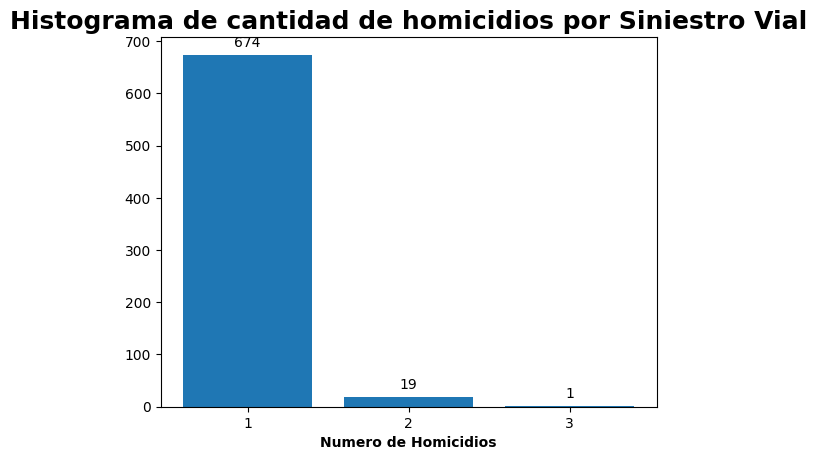

In [236]:
counts, bins, patches = plt.bar(hechos['N_VICTIMAS'].value_counts().index, 
                                hechos['N_VICTIMAS'].value_counts().values)

plt.xticks(ticks=[1, 2, 3], labels=hechos['N_VICTIMAS'].value_counts().index)
plt.xlabel('Numero de Homicidios',fontweight='bold')

plt.title("Histograma de cantidad de homicidios por Siniestro Vial", fontsize=18, fontweight='bold')

for index, value in enumerate(hechos['N_VICTIMAS'].value_counts().values):
    plt.text(index + 1, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


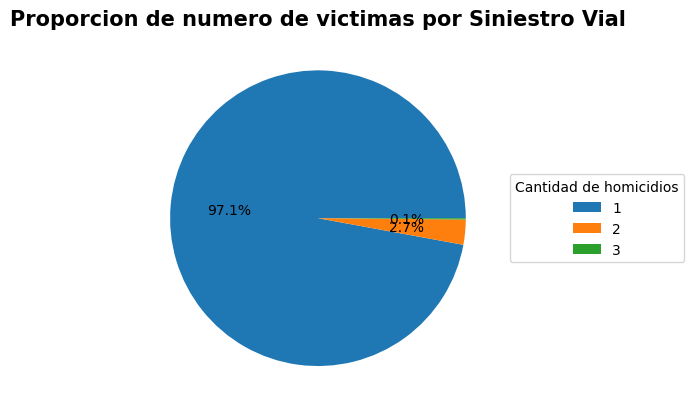

In [237]:
plt.pie(hechos['N_VICTIMAS'].value_counts(),autopct='%1.1f%%')
plt.title('Proporcion de numero de victimas por Siniestro Vial',fontsize=15,fontweight='bold',loc='center')
plt.legend(['1','2','3'],title='Cantidad de homicidios',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### Año

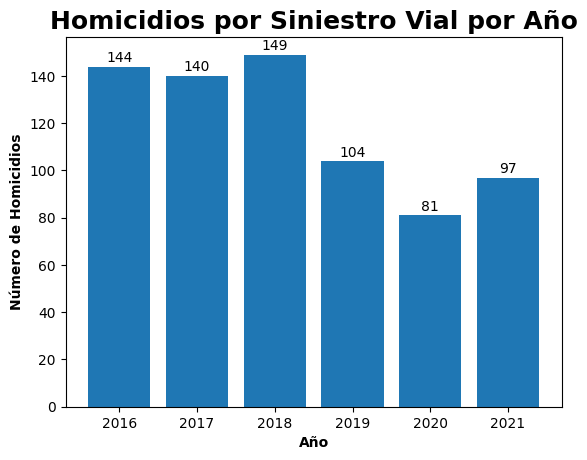

In [346]:
vict_anio = hechos.groupby(['AÑO']).agg({'N_VICTIMAS':'sum'})

plt.bar(vict_anio.index,vict_anio.values.flatten())
plt.xlabel('Año',fontweight='bold')
plt.title("Homicidios por Siniestro Vial por Año", fontsize=18, fontweight='bold')
plt.ylabel('Número de Homicidios', fontweight='bold')

for index, value in enumerate(vict_anio.values.flatten()):
    plt.text(vict_anio.index[index], value + 2, str(int(value)), ha='center')

#### Mes

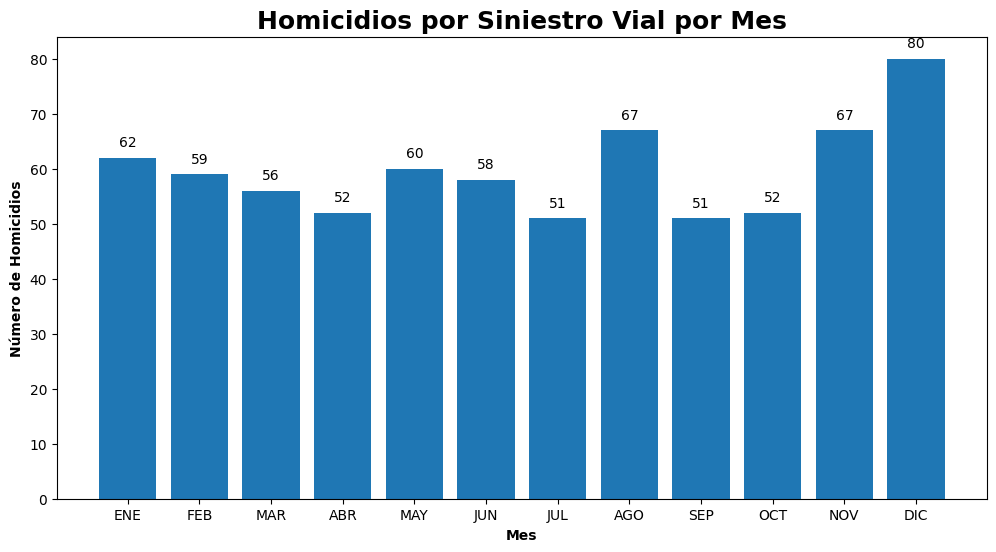

In [345]:
vict_mes = hechos.groupby(['MES']).agg({'N_VICTIMAS':'sum'})

plt.figure(figsize=(12,6))
plt.bar(vict_mes.index,vict_mes.values.flatten())
plt.xlabel('Mes',fontweight='bold')
plt.xticks(labels=['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC'],ticks=vict_mes.index)
plt.title("Homicidios por Siniestro Vial por Mes", fontsize=18, fontweight='bold')
plt.ylabel('Número de Homicidios', fontweight='bold')

for index, value in enumerate(vict_mes.values.flatten()):
    plt.text(vict_mes.index[index], value + 2, str(int(value)), ha='center')

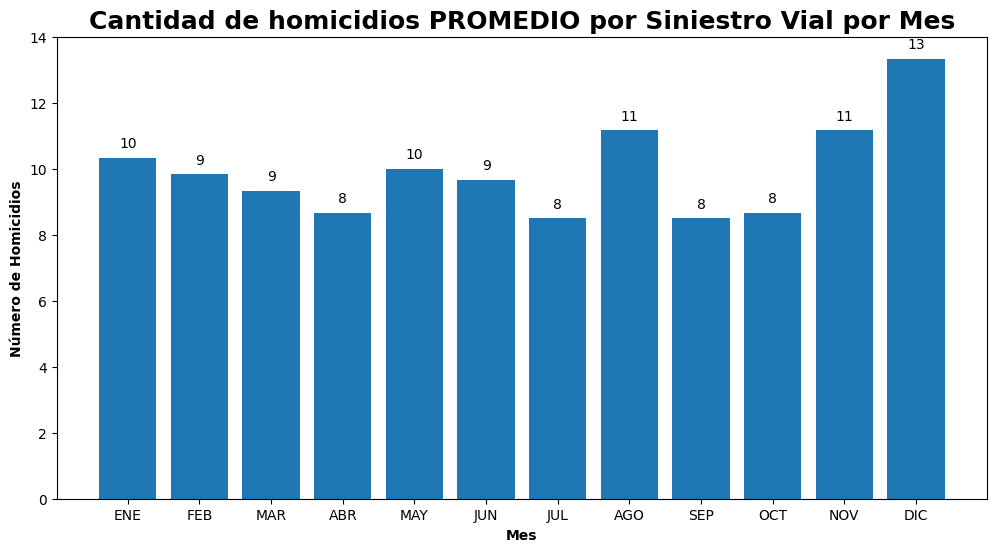

In [344]:
vict_mes_p = vict_mes/6
plt.figure(figsize=(12,6))
plt.bar(vict_mes_p.index,vict_mes_p.values.flatten())
plt.xlabel('Mes',fontweight='bold')
plt.xticks(labels=['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC'],ticks=vict_mes_p.index)
plt.title("Homicidios PROMEDIO por Siniestro Vial por Mes", fontsize=18, fontweight='bold')
plt.ylabel('Número de Homicidios', fontweight='bold')

for index, value in enumerate(vict_mes_p.values.flatten()):
    plt.text(vict_mes_p.index[index], value+0.3, str(int(value)), ha='center')

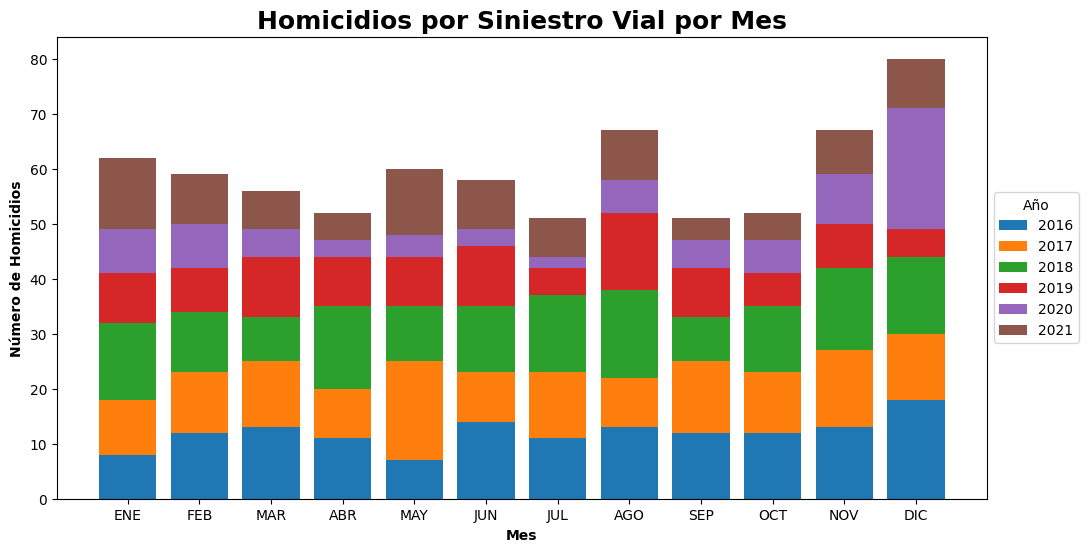

In [347]:
vict_anio_mes = hechos.groupby(['MES', 'AÑO']).agg({'N_VICTIMAS': 'sum'}).unstack()

# Definir los datos de víctimas por mes y año
vict_2016 = vict_anio_mes[('N_VICTIMAS', 2016)].values.flatten()
vict_2017 = vict_anio_mes[('N_VICTIMAS', 2017)].values.flatten()
vict_2018 = vict_anio_mes[('N_VICTIMAS', 2018)].values.flatten()
vict_2019 = vict_anio_mes[('N_VICTIMAS', 2019)].values.flatten()
vict_2020 = vict_anio_mes[('N_VICTIMAS', 2020)].values.flatten()
vict_2021 = vict_anio_mes[('N_VICTIMAS', 2021)].values.flatten()

# Crear figura y gráfico de barras apiladas
plt.figure(figsize=(12, 6))
plt.bar(vict_anio_mes.index, vict_2016, label='2016')
plt.bar(vict_anio_mes.index, vict_2017, bottom=vict_2016, label='2017')
plt.bar(vict_anio_mes.index, vict_2018, bottom=vict_2016 + vict_2017, label='2018')
plt.bar(vict_anio_mes.index, vict_2019, bottom=vict_2016 + vict_2017 + vict_2018, label='2019')
plt.bar(vict_anio_mes.index, vict_2020, bottom=vict_2016 + vict_2017 + vict_2018 + vict_2019, label='2020')
plt.bar(vict_anio_mes.index, vict_2021, bottom=vict_2016 + vict_2017 + vict_2018 + vict_2019 + vict_2020, label='2021')

# Etiquetas y título
plt.xticks(labels=['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC'], ticks=vict_anio_mes.index)
plt.xlabel('Mes', fontweight='bold')
plt.ylabel('Número de Homicidios', fontweight='bold')
plt.title('Homicidios por Siniestro Vial por Mes', fontsize=18, fontweight='bold')

# Añadir leyenda para identificar los años
plt.legend(title='Año',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar gráfico
plt.show()


#### Dia de la semana

Se realizó el analisis por dia de la semana usando la columna numerica (**'DIA_SEMANA'**) y la del nombre se usara en el momento de elaborar el Dasshboard en PowerBI

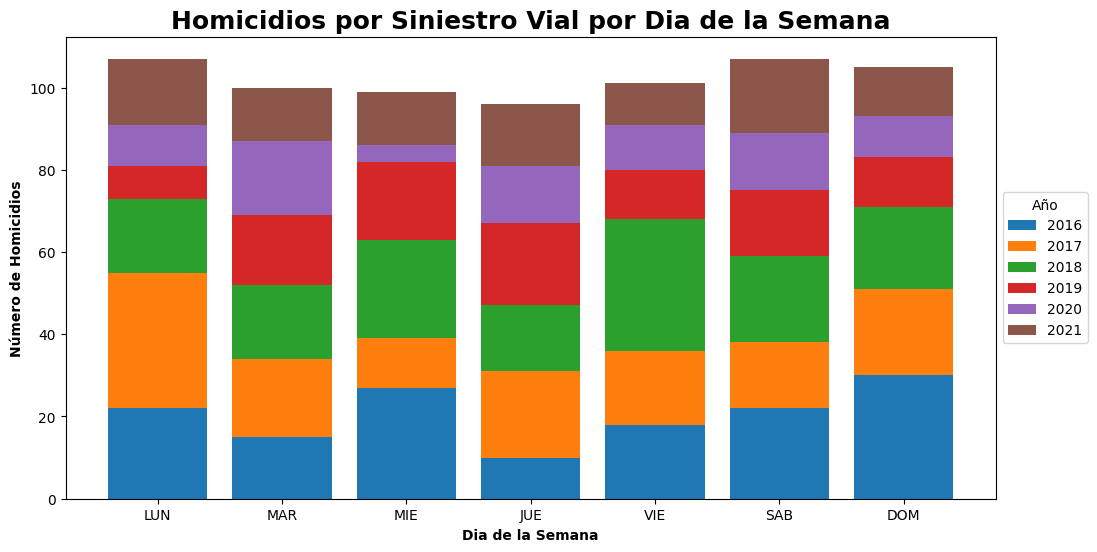

In [348]:
vict_anio_dia = hechos.groupby(['DIA_SEMANA', 'AÑO']).agg({'N_VICTIMAS': 'sum'}).unstack()

# Definir los datos de víctimas por mes y año
vict_2016_d = vict_anio_dia[('N_VICTIMAS', 2016)].values.flatten()
vict_2017_d = vict_anio_dia[('N_VICTIMAS', 2017)].values.flatten()
vict_2018_d = vict_anio_dia[('N_VICTIMAS', 2018)].values.flatten()
vict_2019_d = vict_anio_dia[('N_VICTIMAS', 2019)].values.flatten()
vict_2020_d = vict_anio_dia[('N_VICTIMAS', 2020)].values.flatten()
vict_2021_d = vict_anio_dia[('N_VICTIMAS', 2021)].values.flatten()

# Crear figura y gráfico de barras apiladas
plt.figure(figsize=(12, 6))
plt.bar(vict_anio_dia.index, vict_2016_d, label='2016')
plt.bar(vict_anio_dia.index, vict_2017_d, bottom=vict_2016_d, label='2017')
plt.bar(vict_anio_dia.index, vict_2018_d, bottom=vict_2016_d + vict_2017_d, label='2018')
plt.bar(vict_anio_dia.index, vict_2019_d, bottom=vict_2016_d + vict_2017_d + vict_2018_d, label='2019')
plt.bar(vict_anio_dia.index, vict_2020_d, bottom=vict_2016_d + vict_2017_d + vict_2018_d + vict_2019_d, label='2020')
plt.bar(vict_anio_dia.index, vict_2021_d, bottom=vict_2016_d + vict_2017_d + vict_2018_d + vict_2019_d + vict_2020_d, label='2021')

# Etiquetas y título
plt.xticks(labels=['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM'], ticks=vict_anio_dia.index)
plt.xlabel('Dia de la Semana', fontweight='bold')
plt.ylabel('Número de Homicidios', fontweight='bold')
plt.title('Homicidios por Siniestro Vial por Dia de la Semana', fontsize=18, fontweight='bold')

# Añadir leyenda para identificar los años
plt.legend(title='Año',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar gráfico
plt.show()

#### Hora

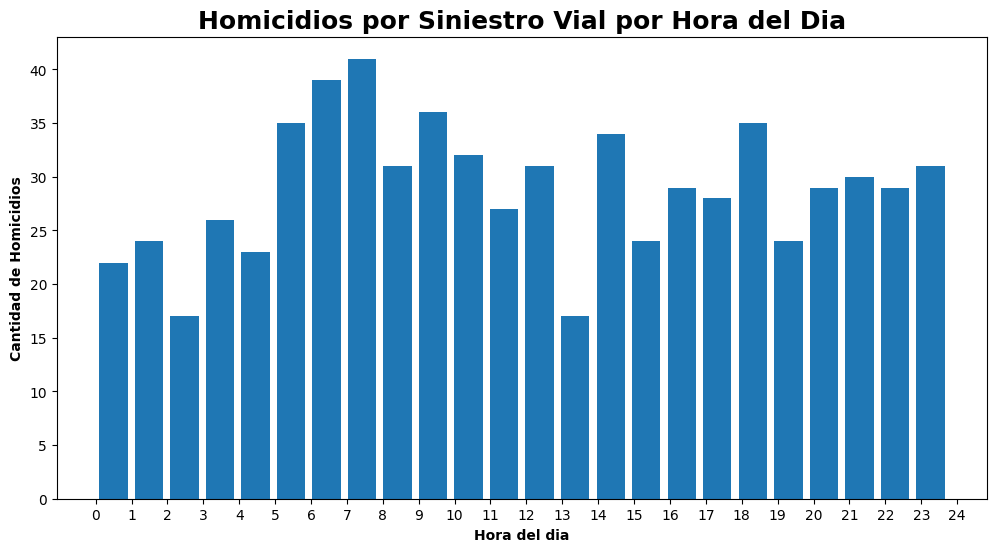

In [349]:
plt.figure(figsize=(12, 6))
plt.hist(hechos['HORA'],rwidth=0.8,bins=24)
plt.title('Homicidios por Siniestro Vial por Hora del Dia', fontsize=18, fontweight='bold')
plt.xlabel('Hora del dia', fontweight='bold')
plt.ylabel('Cantidad de Homicidios', fontweight='bold')
plt.xticks(ticks=range(0,25))
plt.show()

#### Tipo de Calle

In [244]:
hechos['TIPO_DE_CALLE'].value_counts()

TIPO_DE_CALLE
AVENIDA      429
CALLE        135
GRAL PAZ      65
AUTOPISTA     65
Name: count, dtype: int64

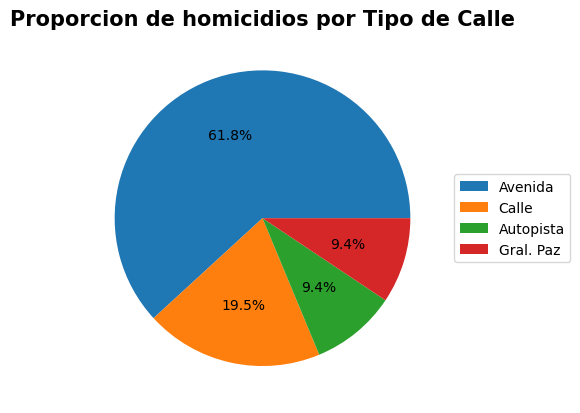

In [263]:
plt.pie(hechos['TIPO_DE_CALLE'].value_counts(),autopct='%1.1f%%')
plt.title('Proporcion de homicidios por Tipo de Calle',fontsize=15,fontweight='bold',loc='center')
plt.legend(['Avenida',
            'Calle',
            'Autopista',
            'Gral. Paz'
],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Vias Involucradas

Se realizó un analisis para identificar cuales son las vias en las que se ha presentado la mayor cantidad de homicidios por Siniestro Vial. Para esto se creo una funcion que permite sacar una lista de frecuencia de las vias involucradas

In [291]:
def frec_unicos(col):
    ''' 
    Funcion que devuelve los valores unicos y las frecuencias de los elementos de las listas que conforman una columna
        Parametros: 
            col (pn.ndarray o list): Columna que se desea procesar 
        Retorno: Tabla de frecuencia (pd.Series)'''
    u = []
    for sublist in col:
        if type(sublist)==np.ndarray or type(sublist)==list:
            for genre in sublist:
                u.append(genre)
    return pd.Series(u).value_counts()

In [295]:
frec_vias=frec_unicos(hechos['VIAS_INVOL'])

In [296]:
frec_vias

PAZ, GRAL. AV.                                71
RIVADAVIA AV.                                 27
DEL LIBERTADOR AV.                            24
ALBERDI, JUAN BAUTISTA AV.                    18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    16
                                              ..
COREA AV.                                      1
TORRES Y TENORIO, PRES.                        1
CASARES AV.                                    1
PILAR                                          1
PADRE CARLOS MUJICA                            1
Name: count, Length: 465, dtype: int64

Se obtuvo que en total para estos años de analisis existen 465 vias diferentes que se encontraron relacionadas con el lugar del hecho. A continuacion se presenta un grafico con las 15 vias en las que se presentaron mas siniestros.

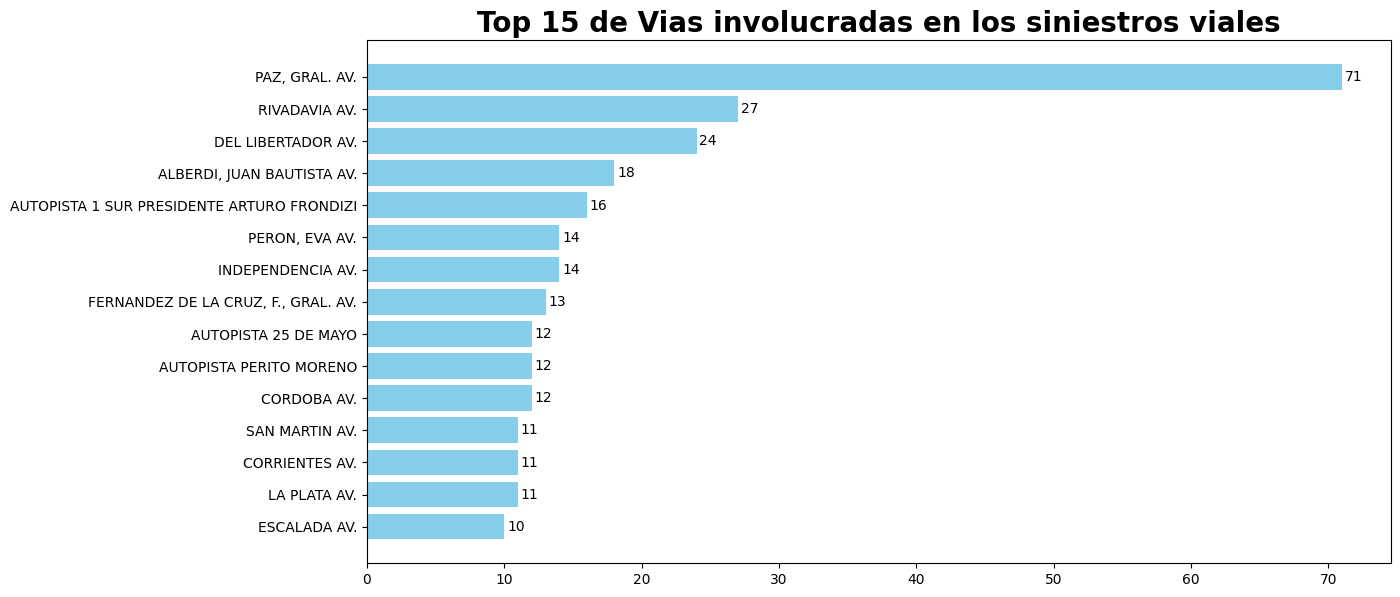

In [299]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(frec_vias.head(15).index,frec_vias.head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 de Vias involucradas en los siniestros viales', fontweight = 'bold',fontsize=20)
for index, value in enumerate(frec_vias.head(15).values):
    plt.text(value+0.2, index, str(value), va='center')
plt.show()

### Interseccion

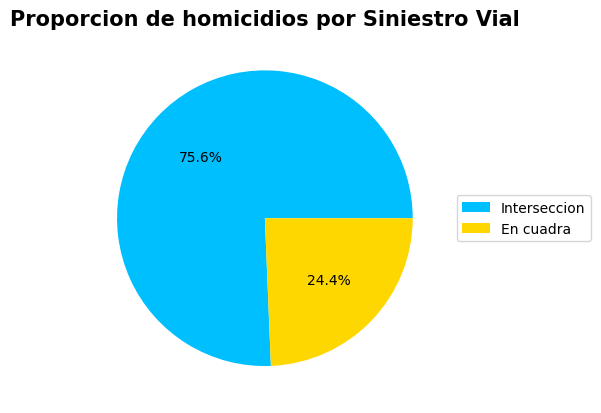

In [327]:
plt.pie(hechos['INTERSECCION'].value_counts(),autopct='%1.1f%%',colors=['deepskyblue','gold'])
plt.title('Proporcion de homicidios por Siniestro Vial',fontsize=15,fontweight='bold',loc='center')
plt.legend(['Interseccion',
            'En cuadra'
],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [265]:
vict_int_cll = hechos.groupby(['TIPO_DE_CALLE','INTERSECCION']).agg({'N_VICTIMAS': 'sum'}).unstack()
vict_int_cll

N_VICTIMAS     
INTERSECCION           0    1
TIPO_DE_CALLE                
AUTOPISTA             40   27
AVENIDA               80  362
CALLE                 45   92
GRAL PAZ              10   59

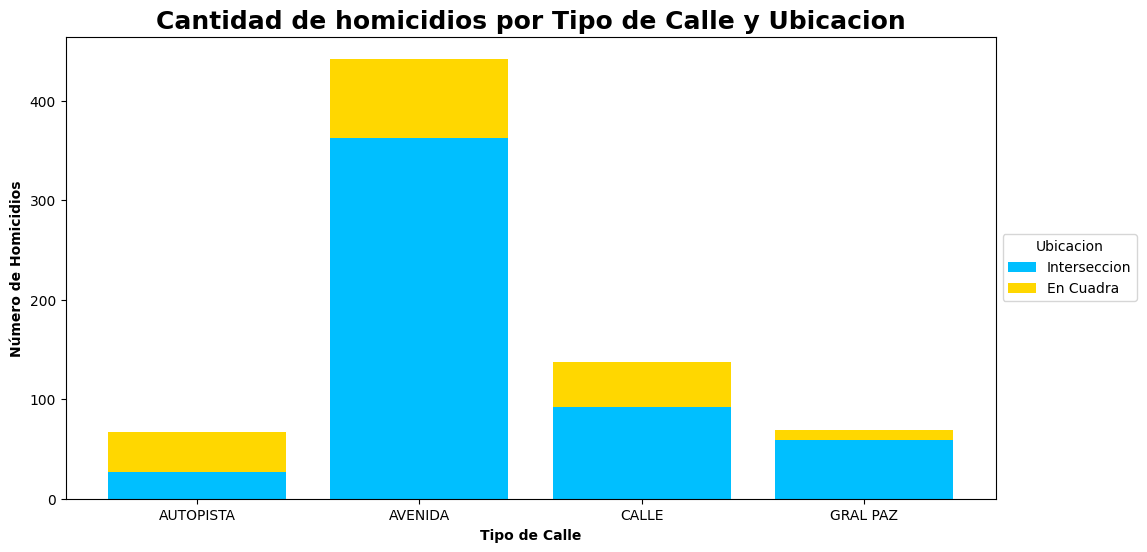

In [350]:
# Definir los datos de víctimas por mes y año
inter = vict_int_cll[('N_VICTIMAS', 1)].values.flatten()
no_inter = vict_int_cll[('N_VICTIMAS', 0)].values.flatten()

# Crear figura y gráfico de barras apiladas
plt.figure(figsize=(12, 6))
plt.bar(vict_int_cll.index, inter, label='Interseccion', color='deepskyblue')
plt.bar(vict_int_cll.index, no_inter, bottom=inter, label='En Cuadra', color='gold')


# Etiquetas y título
plt.xticks( ticks=vict_int_cll.index)
plt.xlabel('Tipo de Calle', fontweight='bold')
plt.ylabel('Número de Homicidios', fontweight='bold')
plt.title('Cantidad de homicidios por Tipo de Calle y Ubicacion', fontsize=18, fontweight='bold')

# Añadir leyenda para identificar los años
plt.legend(title='Ubicacion',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar gráfico
plt.show()

In [331]:
# Se creo un DaataFrame auxiliar para poder identificar como se distibuyen el numero de sinistros por via segun si ocurrienron en una interseccion o no
vias = frec_vias
inter = frec_unicos(hechos[hechos['INTERSECCION']==1]['VIAS_INVOL'])
no_inter = frec_unicos(hechos[hechos['INTERSECCION']==0]['VIAS_INVOL'])
vias_inv = pd.DataFrame({'Vía': vias.index,'Total': vias.values,'Intersección': inter.reindex(vias.index, fill_value=0).values,'En Cuadra': no_inter.reindex(vias.index, fill_value=0).values})

In [332]:
vias_inv=vias_inv.sort_values('Total',ascending=False)
vias_inv

,Vía,Total,Intersección,En Cuadra
0,"PAZ, GRAL. AV.",71,63,8
1,RIVADAVIA AV.,27,19,8
2,DEL LIBERTADOR AV.,24,21,3
3,"ALBERDI, JUAN BAUTISTA AV.",18,15,3
4,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,16,3,13
...,...,...,...,...
428,"ROFFO, ANGEL H., DR.",1,1,0
429,"ANCHORENA, TOMAS MANUEL DE, DR.",1,1,0
430,"DIAZ, CNEL. AV.",1,1,0
431,"DIAZ, ANA",1,1,0


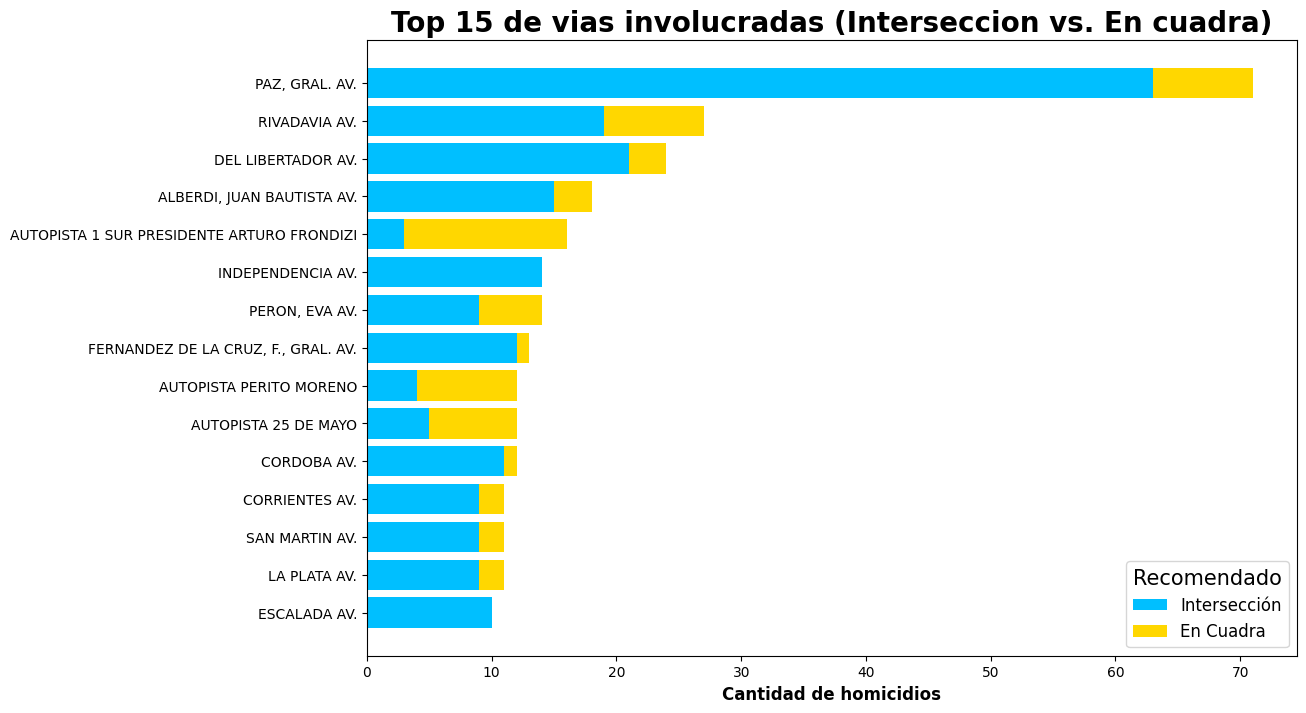

In [352]:
# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
plt.barh(vias_inv['Vía'].head(15), vias_inv['Intersección'].head(15), color='deepskyblue', label='Intersección')
plt.barh(vias_inv['Vía'].head(15), vias_inv['En Cuadra'].head(15), left=vias_inv['Intersección'].head(15), color='gold', label='En Cuadra')


plt.xlabel("Cantidad de homicidios",fontweight='bold',fontsize=12)
plt.title("Top 15 de vias involucradas (Interseccion vs. En cuadra)", fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.legend(title='Recomendado',title_fontsize=15,fontsize=12)
plt.show()

### Comuna

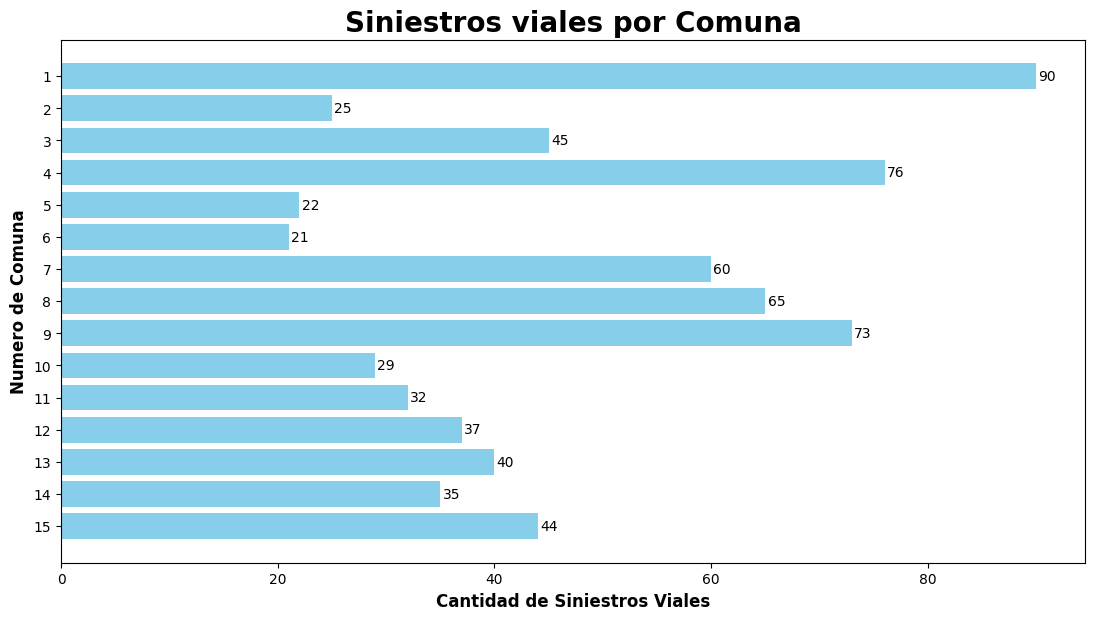

In [276]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(hechos['COMUNA'].value_counts().index,hechos['COMUNA'].value_counts().values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Siniestros viales por Comuna', fontweight = 'bold',fontsize=20)
plt.yticks(ticks=hechos['COMUNA'].value_counts().index)
plt.ylabel('Numero de Comuna',fontweight = 'bold',fontsize=12)
plt.xlabel('Cantidad de Siniestros Viales',fontweight = 'bold',fontsize=12)

comuna_counts = hechos['COMUNA'].value_counts().sort_index()
for index, value in enumerate(comuna_counts.values):
    plt.text(value+0.2, index+1, str(value), va='center')
plt.show()

### Participantes 

Existen 41 combinaciones diferentes entre tipo de victima y de acusado. Se decidio graficar las 15 que mas se presentan.

In [574]:
hechos['PARTICIPANTES'].unique().size

41

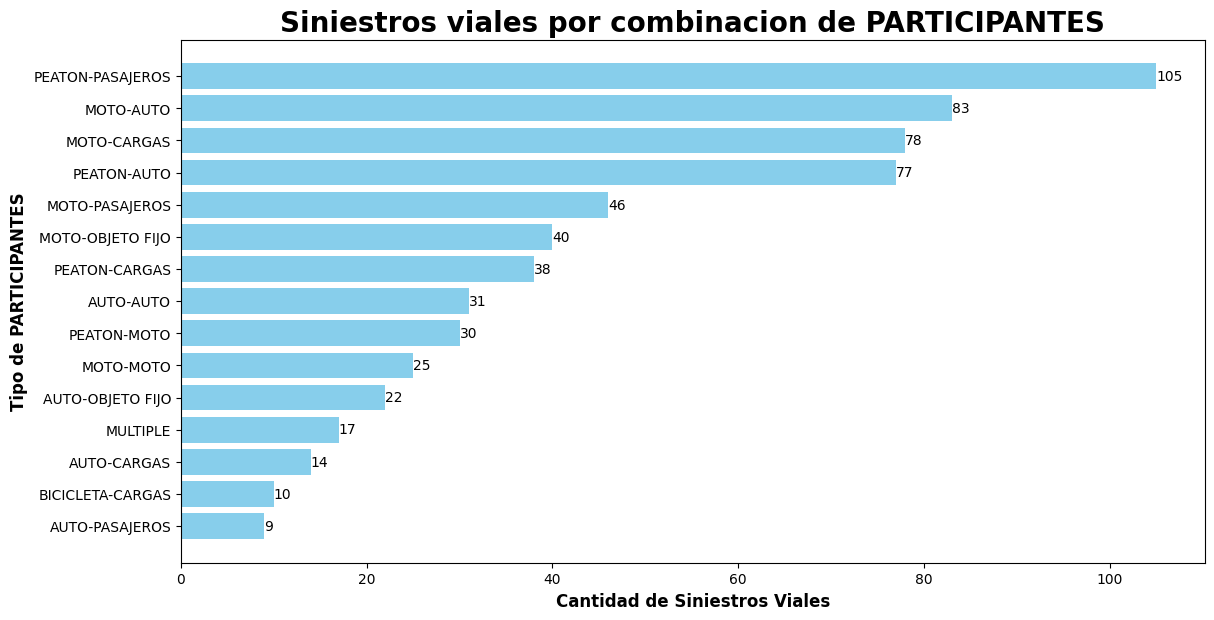

In [587]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(hechos['PARTICIPANTES'].value_counts().head(15).index,hechos['PARTICIPANTES'].value_counts().head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Siniestros viales por combinacion de PARTICIPANTES', fontweight = 'bold',fontsize=20)
plt.yticks(ticks=hechos['PARTICIPANTES'].value_counts().head(15).index)
plt.ylabel('Tipo de PARTICIPANTES',fontweight = 'bold',fontsize=12)
plt.xlabel('Cantidad de Siniestros Viales',fontweight = 'bold',fontsize=12)

PARTICIPANTES_counts = hechos['PARTICIPANTES'].value_counts().head(15).sort_values(ascending=False)
for index, value in enumerate(PARTICIPANTES_counts.values):
    plt.text(value, index, str(value), va='center')
plt.show()


### Victima

Se encontró un valor en la columna **VICTIMA** que no corresponde a la informacion presentada en el diccionario de datoa. Se revisó el registro y determinó que correpondia a un valor del tipo de la columna *'PARTICIPANTES'* donde se encuentra la victima y el acusado. El valor encontrado era 'PEATON_MOTO' y el *'ACUSADO'* para este registro era *MOTO*. De acuerdo con esto se asumió que el valor correcto de *'VICTIMA'* era *PEATON* y se realizo el cambio.

In [365]:
hechos['VICTIMA'].value_counts()

VICTIMA
MOTO           295
PEATON         263
AUTO            83
BICICLETA       29
SD               8
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [353]:
hechos[hechos['VICTIMA']=='PEATON_MOTO']

,ID,N_VICTIMAS,AÑO,MES,DIA_SEMANA,HORA,TIPO_DE_CALLE,VIAS_INVOL,INTERSECCION,COMUNA,VICTIMA,ACUSADO,LONGITUD,LATITUD
583,2020-0063,2,2020,12,5,7.166667,CALLE,"[NUEVA YORK, ALTA GRACIA]",1,11,PEATON_MOTO,MOTO,-58.527838,-34.61047


In [359]:
hechos.loc[(hechos['VICTIMA']=='PEATON_MOTO'),'VICTIMA']='PEATON'

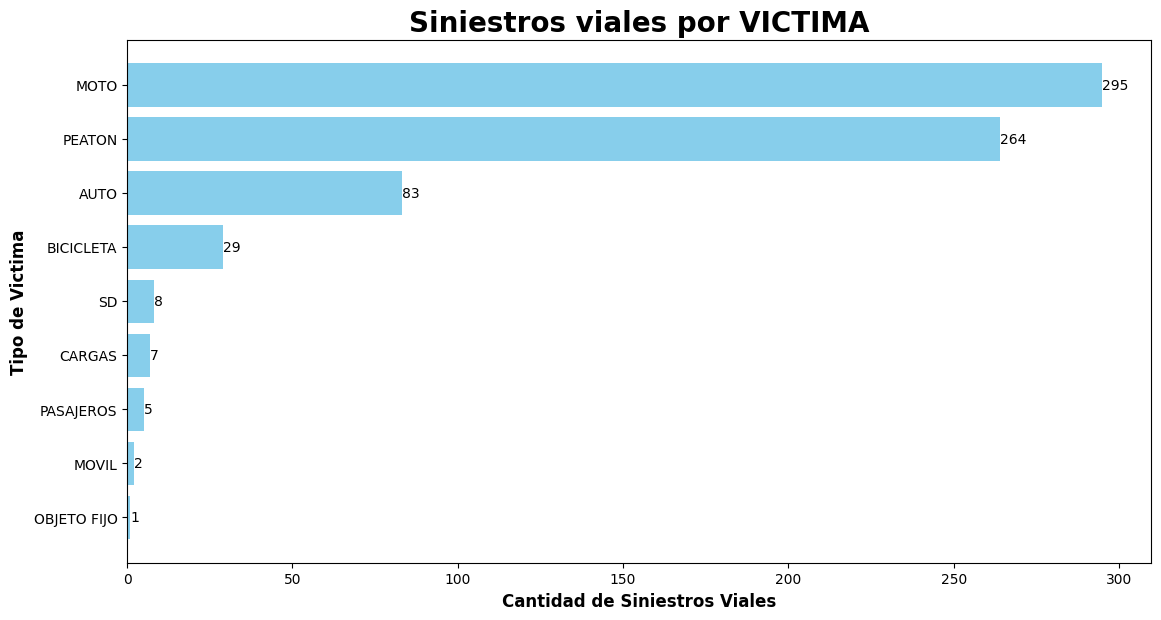

In [362]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(hechos['VICTIMA'].value_counts().index,hechos['VICTIMA'].value_counts().values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Siniestros viales por VICTIMA', fontweight = 'bold',fontsize=20)
plt.yticks(ticks=hechos['VICTIMA'].value_counts().index)
plt.ylabel('Tipo de Victima',fontweight = 'bold',fontsize=12)
plt.xlabel('Cantidad de Siniestros Viales',fontweight = 'bold',fontsize=12)

VICTIMA_counts = hechos['VICTIMA'].value_counts().sort_values(ascending=False)
for index, value in enumerate(VICTIMA_counts.values):
    plt.text(value, index, str(value), va='center')
plt.show()

### Acusado

In [366]:
hechos['ACUSADO'].value_counts()

ACUSADO
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              21
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

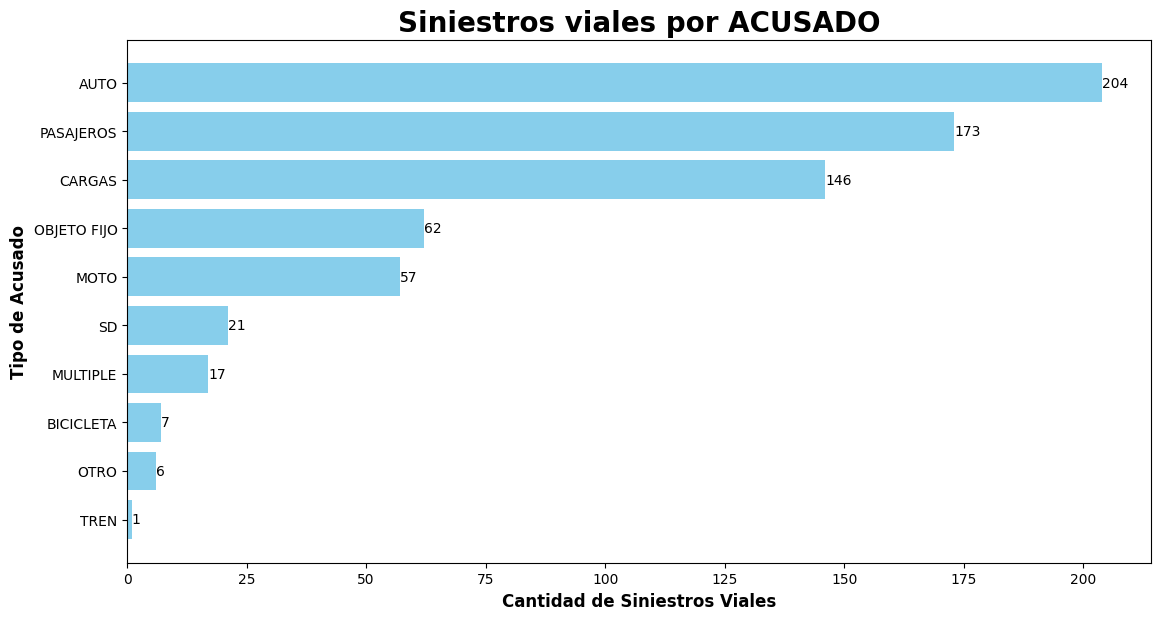

In [368]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(hechos['ACUSADO'].value_counts().index,hechos['ACUSADO'].value_counts().values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Siniestros viales por ACUSADO', fontweight = 'bold',fontsize=20)
plt.yticks(ticks=hechos['ACUSADO'].value_counts().index)
plt.ylabel('Tipo de Acusado',fontweight = 'bold',fontsize=12)
plt.xlabel('Cantidad de Siniestros Viales',fontweight = 'bold',fontsize=12)

ACUSADO_counts = hechos['ACUSADO'].value_counts().sort_values(ascending=False)
for index, value in enumerate(ACUSADO_counts.values):
    plt.text(value, index, str(value), va='center')
plt.show()

## Analisis de Correlacion

In [614]:
hechos_corr = hechos[['N_VICTIMAS', 'AÑO', 'MES', 'DIA_SEMANA','HORA', 'INTERSECCION', 'COMUNA']]

In [615]:
corre = hechos_corr.corr()
corre

,N_VICTIMAS,AÑO,MES,DIA_SEMANA,HORA,INTERSECCION,COMUNA
N_VICTIMAS,1.000000,-0.048160,-0.005072,0.092778,-0.090650,-0.016573,0.006645
AÑO,-0.048160,1.000000,-0.042237,-0.016295,-0.046271,-0.076148,0.002882
MES,-0.005072,-0.042237,1.000000,-0.064151,0.034835,-0.025717,0.054147
DIA_SEMANA,0.092778,-0.016295,-0.064151,1.000000,-0.044164,0.087640,0.016090
HORA,-0.090650,-0.046271,0.034835,-0.044164,1.000000,0.010087,-0.040415
INTERSECCION,-0.016573,-0.076148,-0.025717,0.087640,0.010087,1.000000,0.031091
COMUNA,0.006645,0.002882,0.054147,0.016090,-0.040415,0.031091,1.000000


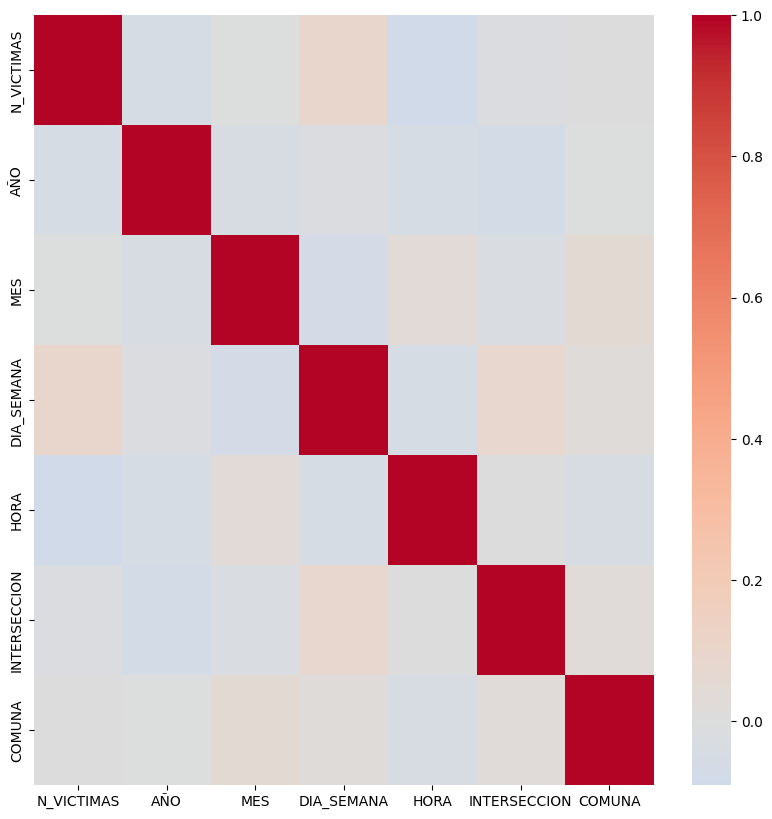

In [616]:
plt.figure(figsize=(10,10))
sns.heatmap(corre,cmap='coolwarm',center=0)
plt.show()

In [608]:
dummies = pd.get_dummies(hechos[['TIPO_DE_CALLE', 'VICTIMA', 'ACUSADO']])
hechos_corr = pd.concat([hechos_corr, dummies], axis=1)
hechos_corr

,N_VICTIMAS,AÑO,MES,DIA_SEMANA,HORA,INTERSECCION,COMUNA,TIPO_DE_CALLE_AUTOPISTA,TIPO_DE_CALLE_AVENIDA,TIPO_DE_CALLE_CALLE,...,ACUSADO_AUTO,ACUSADO_BICICLETA,ACUSADO_CARGAS,ACUSADO_MOTO,ACUSADO_MULTIPLE,ACUSADO_OBJETO FIJO,ACUSADO_OTRO,ACUSADO_PASAJEROS,ACUSADO_SD,ACUSADO_TREN
0,1,2016,1,4,4.000000,1,8,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,1,2016,1,5,1.250000,1,9,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,2016,1,6,7.000000,0,1,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,1,2016,1,6,0.000000,1,8,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,1,2016,1,3,5.333333,1,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,2021,12,0,17.166667,1,7,False,True,False,...,True,False,False,False,False,False,False,False,False,False
692,1,2021,12,0,1.166667,1,9,True,False,False,...,True,False,False,False,False,False,False,False,False,False
693,1,2021,12,3,0.716667,1,11,False,True,False,...,False,False,True,False,False,False,False,False,False,False
694,1,2021,12,2,10.500000,0,9,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [610]:
corre_exp = hechos_corr.corr()
corre_exp

,N_VICTIMAS,AÑO,MES,DIA_SEMANA,HORA,INTERSECCION,COMUNA,TIPO_DE_CALLE_AUTOPISTA,TIPO_DE_CALLE_AVENIDA,TIPO_DE_CALLE_CALLE,...,ACUSADO_AUTO,ACUSADO_BICICLETA,ACUSADO_CARGAS,ACUSADO_MOTO,ACUSADO_MULTIPLE,ACUSADO_OBJETO FIJO,ACUSADO_OTRO,ACUSADO_PASAJEROS,ACUSADO_SD,ACUSADO_TREN
N_VICTIMAS,1.000000,-0.048160,-0.005072,0.092778,-0.090650,-0.016573,0.006645,0.000913,0.000309,-0.042280,...,-0.003047,-0.017015,-0.008229,-0.021189,-0.026711,0.087911,-0.015741,-0.004358,-0.029776,-0.006403
AÑO,-0.048160,1.000000,-0.042237,-0.016295,-0.046271,-0.076148,0.002882,0.012816,0.011556,-0.000565,...,0.036349,0.031214,0.032810,-0.034619,0.003844,0.123043,0.016972,-0.094431,-0.120531,0.018204
MES,-0.005072,-0.042237,1.000000,-0.064151,0.034835,-0.025717,0.054147,0.034529,-0.005950,-0.041485,...,-0.023470,0.033373,-0.063564,0.082915,-0.069399,-0.056802,0.025885,0.084654,-0.017114,0.035396
DIA_SEMANA,0.092778,-0.016295,-0.064151,1.000000,-0.044164,0.087640,0.016090,-0.021461,-0.029255,0.006347,...,0.134120,-0.020441,-0.185624,-0.041312,-0.030773,0.202584,-0.006826,-0.080246,0.063977,-0.018418
HORA,-0.090650,-0.046271,0.034835,-0.044164,1.000000,0.010087,-0.040415,-0.005432,0.028945,0.036660,...,-0.034092,0.009034,-0.028060,0.126670,0.019315,-0.180582,-0.007992,0.109910,-0.053783,0.058363
INTERSECCION,-0.016573,-0.076148,-0.025717,0.087640,0.010087,1.000000,0.031091,-0.255475,0.189809,-0.102839,...,0.019729,-0.077120,-0.011916,0.010765,-0.018682,-0.128318,0.052984,0.070841,0.021829,0.021552
COMUNA,0.006645,0.002882,0.054147,0.016090,-0.040415,0.031091,1.000000,-0.032844,-0.011280,-0.113488,...,0.057786,0.009477,-0.041415,0.034257,0.041375,0.058127,0.022499,-0.125918,0.051216,0.022185
TIPO_DE_CALLE_AUTOPISTA,0.000913,0.012816,0.034529,-0.021461,-0.005432,-0.255475,-0.032844,1.000000,-0.409013,-0.157976,...,-0.022869,-0.032449,0.101025,-0.006099,0.013046,0.107382,-0.030020,-0.139511,0.029828,-0.012211
TIPO_DE_CALLE_AVENIDA,0.000309,0.011556,-0.005950,-0.029255,0.028945,0.189809,-0.011280,-0.409013,1.000000,-0.625269,...,-0.020206,-0.039390,-0.052762,0.051473,-0.009759,-0.055377,0.009325,0.110100,-0.051617,-0.048332
TIPO_DE_CALLE_CALLE,-0.042280,-0.000565,-0.041485,0.006347,0.036660,-0.102839,-0.113488,-0.157976,-0.625269,1.000000,...,0.026504,0.096114,0.005354,-0.040939,-0.030776,-0.064584,-0.006572,0.036581,-0.044308,0.077299


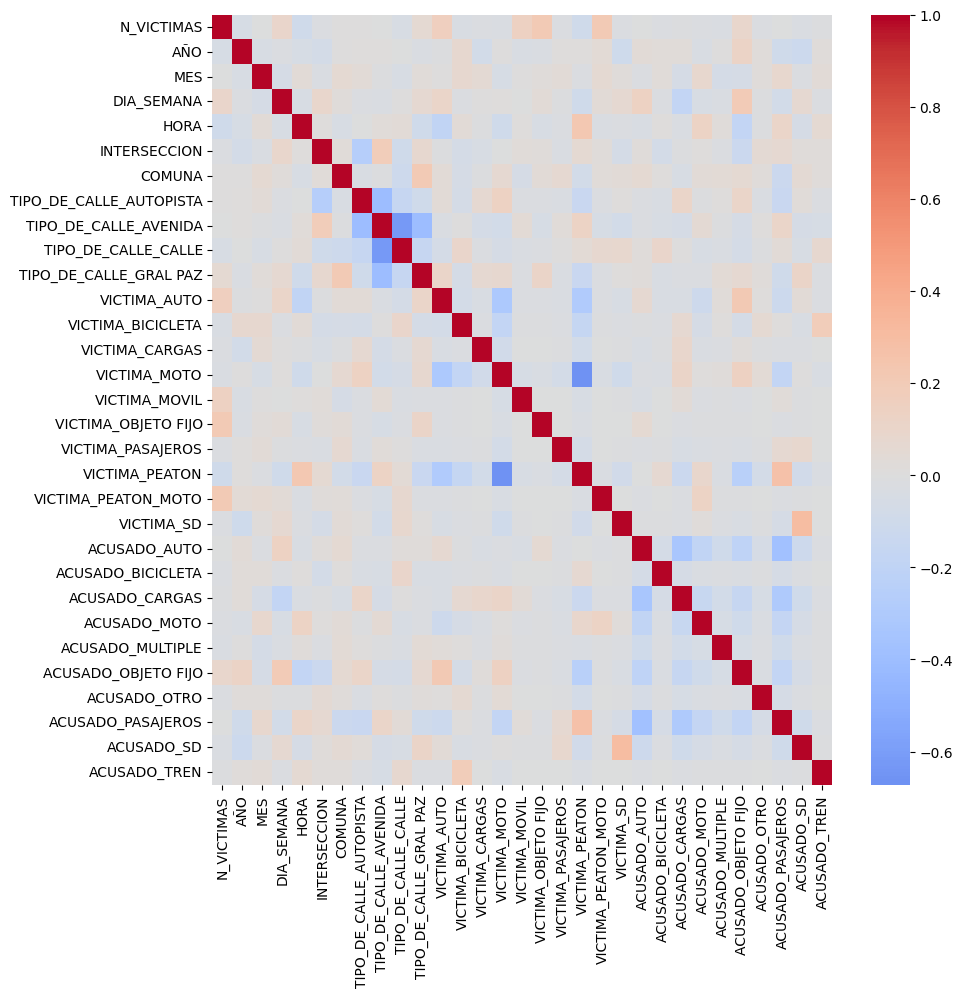

In [612]:
plt.figure(figsize=(10,10))
sns.heatmap(corre_exp,cmap='coolwarm',center=0)
plt.show()

## Exportar archivos

In [617]:
hechos

,ID,N_VICTIMAS,AÑO,MES,DIA_SEMANA,DIA_SEMANA_NOM,HORA,TIPO_DE_CALLE,VIAS_INVOL,INTERSECCION,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,LONGITUD,LATITUD
0,2016-0001,1,2016,1,4,VIERNES,4.000000,AVENIDA,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G...",1,8,MOTO-AUTO,MOTO,AUTO,-58.475340,-34.687570
1,2016-0002,1,2016,1,5,SÁBADO,1.250000,GRAL PAZ,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]",1,9,AUTO-PASAJEROS,AUTO,PASAJEROS,-58.508775,-34.669777
2,2016-0003,1,2016,1,6,DOMINGO,7.000000,AVENIDA,[ENTRE RIOS AV.],0,1,MOTO-AUTO,MOTO,AUTO,-58.390403,-34.631894
3,2016-0004,1,2016,1,6,DOMINGO,0.000000,AVENIDA,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]",1,8,MOTO-SD,MOTO,SD,-58.465039,-34.680930
4,2016-0005,1,2016,1,3,JUEVES,5.333333,AVENIDA,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]",1,1,MOTO-PASAJEROS,MOTO,PASAJEROS,-58.387183,-34.622466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,0,LUNES,17.166667,AVENIDA,"[RIESTRA AV., MOM]",1,7,MOTO-AUTO,MOTO,AUTO,-58.433538,-34.645616
692,2021-0094,1,2021,12,0,LUNES,1.166667,AUTOPISTA,"[DELLEPIANE, LUIS, TTE. GRAL., LACARRA AV.]",1,9,MOTO-AUTO,MOTO,AUTO,-58.467398,-34.651178
693,2021-0095,1,2021,12,3,JUEVES,0.716667,AVENIDA,"[GAONA AV., TERRADA]",1,11,MOTO-CARGAS,MOTO,CARGAS,-58.472934,-34.619847
694,2021-0096,1,2021,12,2,MIÉRCOLES,10.500000,AVENIDA,"[PERON, EVA AV.]",0,9,AUTO-CARGAS,AUTO,CARGAS,-58.470668,-34.650217


In [620]:
hechos.to_csv('hechos.csv', index=False)